In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
ruta_train = "/content/drive/MyDrive/datasets_lstm/Google_Stock_Train (2010-2022).csv"
ruta_test = "/content/drive/MyDrive/datasets_lstm/Google_Stock_Test (2023).csv"

In [ ]:
train = pd.read_csv(ruta_train)
test = pd.read_csv(ruta_test)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train['Close'].values.reshape(-1, 1))
scaled_test_data = scaler.transform(test['Close'].values.reshape(-1, 1))

def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)

seq_length = 50
x_train, y_train = create_sequences(scaled_train_data, seq_length)
x_test, y_test = create_sequences(scaled_test_data, seq_length)

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
print(x_train.shape)

# Reshape para LSTM [samples, time steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

(3222, 50)


In [ ]:
model = Sequential()
model.add(LSTM(units=90, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(85, activation='relu', return_sequences=False))  # Última capa LSTM
model.add(Dense(85, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 14s 106ms/step - loss: 0.0300 - val_loss: 4.0339e-04
Epoch 2/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - loss: 5.5030e-04 - val_loss: 4.1211e-04
Epoch 3/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 4.5323e-04 - val_loss: 3.3051e-04
Epoch 4/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - loss: 5.1460e-04 - val_loss: 3.4325e-04
Epoch 5/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - loss: 4.6724e-04 - val_loss: 3.5498e-04
Epoch 6/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 72ms/step - loss: 3.7621e-04 - val_loss: 3.6014e-04
Epoch 7/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - loss: 4.1485e-04 - val_loss: 4.7317e-04
Epoch 8/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 5.8349e-04 - val_loss: 2.4662e-04
Epoch 9/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - loss: 4.0924e-04 - val_loss: 3.0234e-04
Epoch 10/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 3.5998e-04 - val_loss: 2.7910e-04
Epoch 11/30
81/81 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 4.24

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 261ms/step
MSE: 10.88067232342149
MAE: 2.5840856090967317
R2: 0.8653669813951752


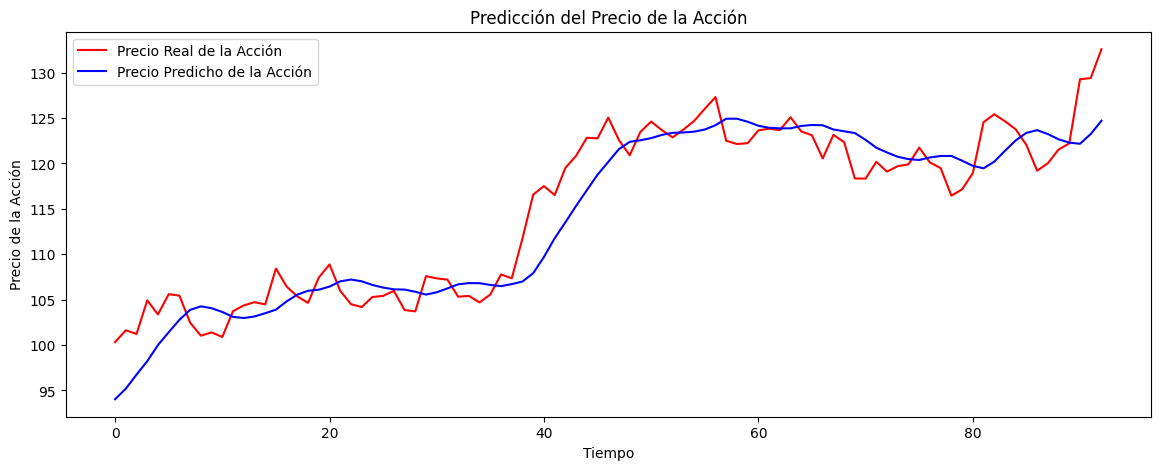

   Predicted      Actual
0  94.030197  100.320000
1  95.193367  101.620003
2  96.741859  101.220001
3  98.221748  104.919998
4  99.994316  103.370003


In [ ]:
# Predicción
predicted_stock_price = model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Cálculo de métricas
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
r2 = r2_score(actual_stock_price, predicted_stock_price)


print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')


# Visualización
plt.figure(figsize=(14, 5))
plt.plot(actual_stock_price, color='red', label='Precio Real de la Acción')
plt.plot(predicted_stock_price, color='blue', label='Precio Predicho de la Acción')
plt.title('Predicción del Precio de la Acción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de la Acción')
plt.legend()
plt.show()

# Mostrar los datos predichos vs los reales
pred_vs_actual = pd.DataFrame({"Predicted": predicted_stock_price.flatten(), "Actual": actual_stock_price.flatten()})
print(pred_vs_actual.head())

Vamos a intentar con menos secuencia

In [ ]:
def intento_RNN(tam_secuencia, unidades):
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled_train_data = scaler.fit_transform(train['Close'].values.reshape(-1, 1))
  scaled_test_data = scaler.transform(test['Close'].values.reshape(-1, 1))
  seq_length = tam_secuencia
  x_train, y_train = create_sequences(scaled_train_data, seq_length)
  x_test, y_test = create_sequences(scaled_test_data, seq_length)

  X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

  # Reshape para LSTM [samples, time steps, features]
  X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
  X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
  x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

  model_2 = Sequential()
  model_2.add(LSTM(units=unidades, return_sequences=True, input_shape=(X_train.shape[1], 1)))
  model_2.add(Dropout(0.2))
  model_2.add(LSTM(unidades, activation='relu', return_sequences=False))  # Última capa LSTM
  model_2.add(Dense(unidades, activation='relu'))
  model_2.add(Dense(1))

  model_2.compile(optimizer='adam', loss='mean_squared_error')

  # Entrenamiento del modelo
  history = model_2.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val))

  # Predicción
  predicted_stock_price = model_2.predict(x_test)
  predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
  actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

  # Cálculo de métricas
  mse = mean_squared_error(actual_stock_price, predicted_stock_price)
  mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
  r2 = r2_score(actual_stock_price, predicted_stock_price)


  print(f'MSE: {mse}')
  print(f'MAE: {mae}')
  print(f'R2: {r2}')

  # Visualización
  plt.figure(figsize=(14, 5))
  plt.plot(actual_stock_price, color='red', label='Precio Real de la Acción')
  plt.plot(predicted_stock_price, color='blue', label='Precio Predicho de la Acción')
  plt.title('Predicción del Precio de la Acción')
  plt.xlabel('Tiempo')
  plt.ylabel('Precio de la Acción')
  plt.legend()
  plt.show()

  # Mostrar los datos predichos vs los reales
  pred_vs_actual = pd.DataFrame({"Predicted": predicted_stock_price.flatten(), "Actual": actual_stock_price.flatten()})
  print(pred_vs_actual.head())

Epoch 1/30
82/82 [==============================] - 7s 38ms/step - loss: 0.0111 - val_loss: 3.2525e-04
Epoch 2/30
82/82 [==============================] - 3s 40ms/step - loss: 4.6769e-04 - val_loss: 3.6481e-04
Epoch 3/30
82/82 [==============================] - 4s 46ms/step - loss: 4.6520e-04 - val_loss: 3.5298e-04
Epoch 4/30
82/82 [==============================] - 2s 30ms/step - loss: 4.9131e-04 - val_loss: 3.3022e-04
Epoch 5/30
82/82 [==============================] - 3s 31ms/step - loss: 4.0490e-04 - val_loss: 4.9073e-04
Epoch 6/30
82/82 [==============================] - 2s 30ms/step - loss: 4.5307e-04 - val_loss: 6.8382e-04
Epoch 7/30
82/82 [==============================] - 3s 33ms/step - loss: 4.5097e-04 - val_loss: 2.5805e-04
Epoch 8/30
82/82 [==============================] - 4s 47ms/step - loss: 4.9832e-04 - val_loss: 4.1293e-04
Epoch 9/30
82/82 [==============================] - 3s 35ms/step - loss: 4.1241e-04 - val_loss: 2.4254e-04
Epoch 10/30
82/82 [======================

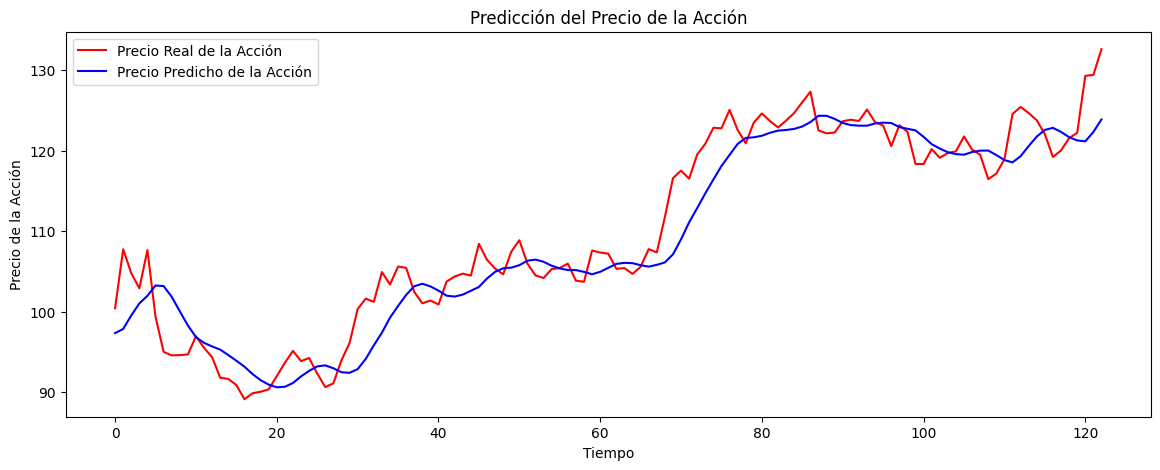

    Predicted      Actual
0   97.337395  100.430000
1   97.857964  107.739998
2   99.525749  104.779999
3  101.026649  102.900002
4  101.973083  107.639999


In [ ]:
intento_RNN(20, 85)

Epoch 1/30
82/82 [==============================] - 8s 27ms/step - loss: 0.0107 - val_loss: 2.5775e-04
Epoch 2/30
82/82 [==============================] - 2s 18ms/step - loss: 4.1598e-04 - val_loss: 2.7282e-04
Epoch 3/30
82/82 [==============================] - 2s 19ms/step - loss: 4.0058e-04 - val_loss: 2.5611e-04
Epoch 4/30
82/82 [==============================] - 2s 19ms/step - loss: 3.8615e-04 - val_loss: 3.5760e-04
Epoch 5/30
82/82 [==============================] - 2s 24ms/step - loss: 3.7079e-04 - val_loss: 5.0372e-04
Epoch 6/30
82/82 [==============================] - 3s 32ms/step - loss: 3.9635e-04 - val_loss: 2.7336e-04
Epoch 7/30
82/82 [==============================] - 2s 26ms/step - loss: 3.6240e-04 - val_loss: 7.0161e-04
Epoch 8/30
82/82 [==============================] - 2s 18ms/step - loss: 3.6919e-04 - val_loss: 2.2206e-04
Epoch 9/30
82/82 [==============================] - 1s 18ms/step - loss: 3.6806e-04 - val_loss: 2.4399e-04
Epoch 10/30
82/82 [======================

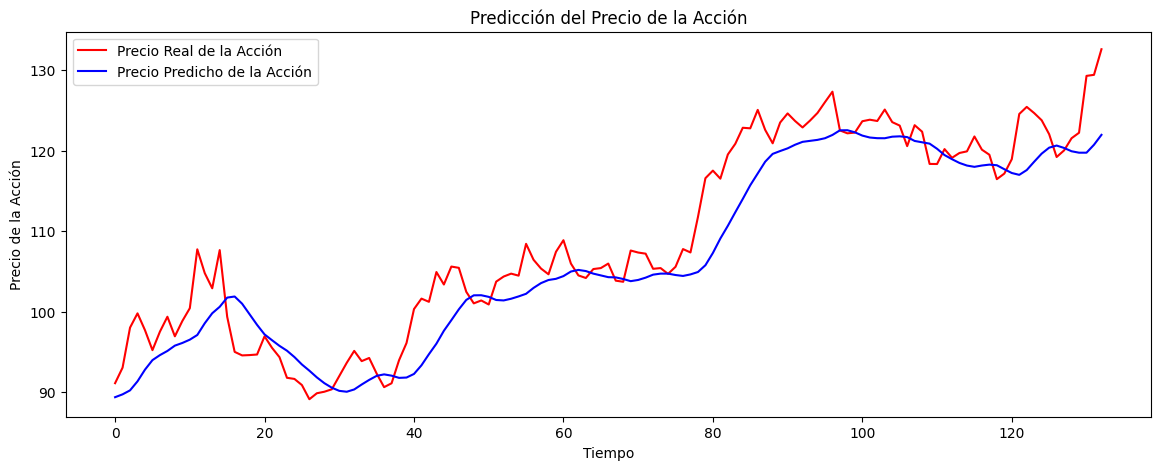

   Predicted     Actual
0  89.381836  91.120003
1  89.735397  93.050003
2  90.230202  98.019997
3  91.352402  99.790001
4  92.801445  97.699997


In [ ]:
intento_RNN(10, 85)

Epoch 1/30
82/82 [==============================] - 9s 62ms/step - loss: 0.0090 - val_loss: 3.4642e-04
Epoch 2/30
82/82 [==============================] - 4s 53ms/step - loss: 5.2067e-04 - val_loss: 3.4686e-04
Epoch 3/30
82/82 [==============================] - 3s 42ms/step - loss: 4.9706e-04 - val_loss: 2.9662e-04
Epoch 4/30
82/82 [==============================] - 3s 43ms/step - loss: 4.2641e-04 - val_loss: 3.0302e-04
Epoch 5/30
82/82 [==============================] - 5s 66ms/step - loss: 4.3718e-04 - val_loss: 2.9632e-04
Epoch 6/30
82/82 [==============================] - 4s 45ms/step - loss: 4.8938e-04 - val_loss: 2.8722e-04
Epoch 7/30
82/82 [==============================] - 3s 42ms/step - loss: 4.5979e-04 - val_loss: 2.7251e-04
Epoch 8/30
82/82 [==============================] - 3s 42ms/step - loss: 4.4602e-04 - val_loss: 4.3042e-04
Epoch 9/30
82/82 [==============================] - 6s 69ms/step - loss: 4.0900e-04 - val_loss: 4.5967e-04
Epoch 10/30
82/82 [======================

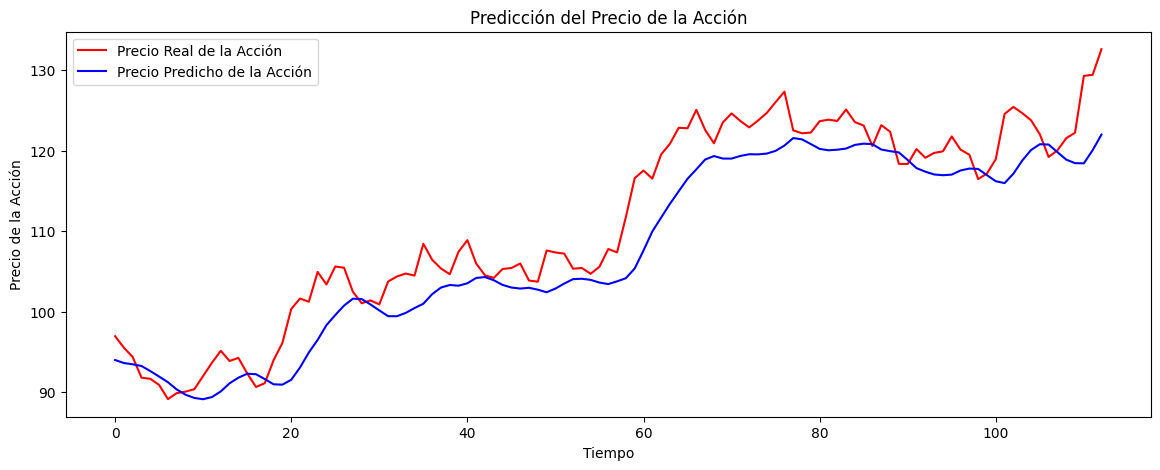

   Predicted     Actual
0  93.981392  96.940002
1  93.609879  95.510002
2  93.449280  94.349998
3  93.238922  91.790001
4  92.606987  91.650002


In [ ]:
intento_RNN(30, 85)

# **Uso de grid serch**

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def create_and_train_model(units, seq_length, epochs, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=units, activation='relu', return_sequences=False))
    model.add(Dense(units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    return model


In [ ]:
# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_data = scaler.fit_transform(train['Close'].values.reshape(-1, 1))
scaled_test_data = scaler.transform(test['Close'].values.reshape(-1, 1))

# Definir la función para crear secuencias
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(seq_length, len(data)):
        x.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(x), np.array(y)


In [ ]:
# Definir los parámetros para probar
units_list = [50, 100, 150]
seq_length_list = [30, 60, 90]
epochs_list = [10, 20, 30]

best_r2 = -np.inf
best_params = {}

# Realizar la búsqueda manual
for seq_length in seq_length_list:
    x_train, y_train = create_sequences(scaled_train_data, seq_length)
    x_test, y_test = create_sequences(scaled_test_data, seq_length)

    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Reshape para LSTM [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

    for units in units_list:
        for epochs in epochs_list:
            print(f"Training with seq_length={seq_length}, units={units}, epochs={epochs}")
            model = create_and_train_model(units, seq_length, epochs, X_train, y_train, X_val, y_val)

            # Predicción
            predicted_stock_price = model.predict(x_test)
            predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
            actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

            # Cálculo de métricas
            r2 = r2_score(actual_stock_price, predicted_stock_price)

            if r2 > best_r2:
                best_r2 = r2
                best_params = {'seq_length': seq_length, 'units': units, 'epochs': epochs}

# Mostrar los mejores resultados
print(f"Best R2 Score: {best_r2}")
print(f"Best Parameters: {best_params}")


Training with seq_length=30, units=50, epochs=10
4/4 [==============================] - 1s 8ms/step
Training with seq_length=30, units=50, epochs=20
4/4 [==============================] - 1s 10ms/step
Training with seq_length=30, units=50, epochs=30
4/4 [==============================] - 1s 15ms/step
Training with seq_length=30, units=100, epochs=10
4/4 [==============================] - 1s 13ms/step
Training with seq_length=30, units=100, epochs=20
4/4 [==============================] - 1s 14ms/step
Training with seq_length=30, units=100, epochs=30
4/4 [==============================] - 1s 16ms/step
Training with seq_length=30, units=150, epochs=10
4/4 [==============================] - 1s 37ms/step
Training with seq_length=30, units=150, epochs=20
4/4 [==============================] - 1s 30ms/step
Training with seq_length=30, units=150, epochs=30
4/4 [==============================] - 1s 31ms/step
Training with seq_length=60, units=50, epochs=10
3/3 [==============================] 

3/3 [==============================] - 1s 29ms/step
Training with seq_length=60, units=100, epochs=20


3/3 [==============================] - 1s 28ms/step
Training with seq_length=60, units=100, epochs=30
3/3 [==============================] - 1s 41ms/step
Training with seq_length=60, units=150, epochs=10
3/3 [==============================] - 1s 62ms/step
Training with seq_length=60, units=150, epochs=20
3/3 [==============================] - 1s 65ms/step
Training with seq_length=60, units=150, epochs=30
3/3 [==============================] - 1s 109ms/step
Training with seq_length=90, units=50, epochs=10
2/2 [==============================] - 1s 23ms/step
Training with seq_length=90, units=50, epochs=20
2/2 [==============================] - 1s 23ms/step
Training with seq_length=90, units=50, epochs=30
2/2 [==============================] - 1s 23ms/step
Training with seq_length=90, units=100, epochs=10
2/2 [==============================] - 1s 36ms/step
Training with seq_length=90, units=100, epochs=20
2/2 [==============================] - 1s 43ms/step
Training with seq_length=90, uni

In [ ]:
# Preparar los datos con el mejor tam_secuencia
best_seq_length = best_params['seq_length']
x_train, y_train = create_sequences(scaled_train_data, best_seq_length)
x_test, y_test = create_sequences(scaled_test_data, best_seq_length)

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Crear y entrenar el mejor modelo
best_model = create_and_train_model(best_params['units'], best_params['seq_length'], best_params['epochs'], X_train, y_train, X_val, y_val)

# Predicción
predicted_stock_price = best_model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Cálculo de métricas
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
r2 = r2_score(actual_stock_price, predicted_stock_price)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')



4/4 [==============================] - 1s 37ms/step
MSE: 11.944498763658245
MAE: 2.8808563848520468
R2: 0.9147297060011789


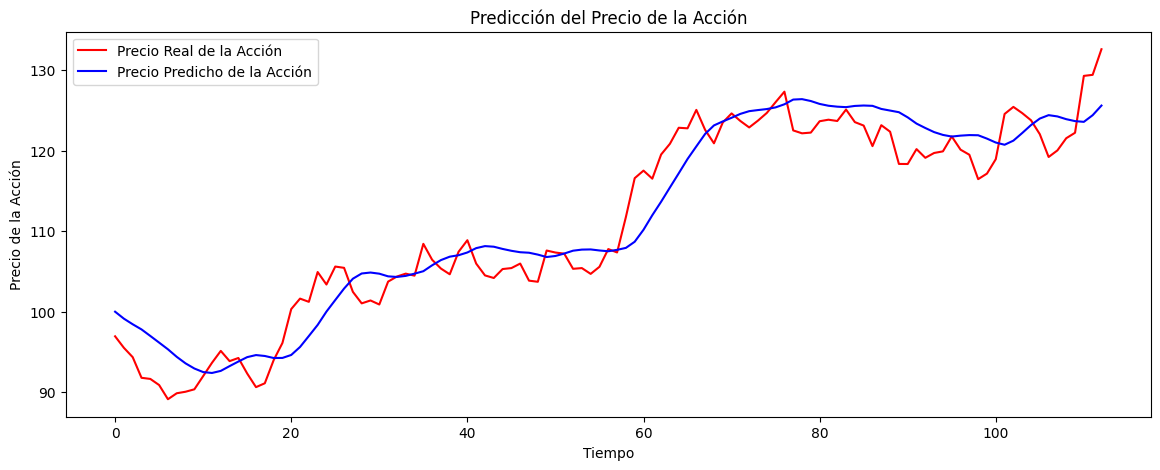

In [ ]:
# Visualización
plt.figure(figsize=(14, 5))
plt.plot(actual_stock_price, color='red', label='Precio Real de la Acción')
plt.plot(predicted_stock_price, color='blue', label='Precio Predicho de la Acción')
plt.title('Predicción del Precio de la Acción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de la Acción')
plt.legend()
plt.show()

# **Cambio de modelo**

In [ ]:
def create_and_train_model_2(units, seq_length, epochs, X_train, y_train, X_val, y_val):
    model = Sequential()
    model.add(LSTM(units=units, return_sequences=True, input_shape=(seq_length, 1)))
    model.add(LSTM(units=units, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_val, y_val), verbose=0)
    return model

In [ ]:
# Definir los parámetros para probar
units_list = [50, 100, 150]
seq_length_list = [30, 60, 90]
epochs_list = [10, 20, 30]

best_r2 = -np.inf
best_params = {}

# Realizar la búsqueda manual
for seq_length in seq_length_list:
    x_train, y_train = create_sequences(scaled_train_data, seq_length)
    x_test, y_test = create_sequences(scaled_test_data, seq_length)

    X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

    # Reshape para LSTM [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

    for units in units_list:
        for epochs in epochs_list:
            print(f"Training with seq_length={seq_length}, units={units}, epochs={epochs}")
            model_2 = create_and_train_model_2(units, seq_length, epochs, X_train, y_train, X_val, y_val)

            # Predicción
            predicted_stock_price = model_2.predict(x_test)
            predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
            actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

            # Cálculo de métricas
            r2 = r2_score(actual_stock_price, predicted_stock_price)

            if r2 > best_r2:
                best_r2 = r2
                best_params = {'seq_length': seq_length, 'units': units, 'epochs': epochs}

# Mostrar los mejores resultados
print(f"Best R2 Score: {best_r2}")
print(f"Best Parameters: {best_params}")

Training with seq_length=30, units=50, epochs=10
4/4 [==============================] - 1s 15ms/step
Training with seq_length=30, units=50, epochs=20
4/4 [==============================] - 1s 9ms/step
Training with seq_length=30, units=50, epochs=30
4/4 [==============================] - 1s 14ms/step
Training with seq_length=30, units=100, epochs=10
4/4 [==============================] - 1s 15ms/step
Training with seq_length=30, units=100, epochs=20
4/4 [==============================] - 1s 14ms/step
Training with seq_length=30, units=100, epochs=30
4/4 [==============================] - 1s 15ms/step
Training with seq_length=30, units=150, epochs=10
4/4 [==============================] - 1s 31ms/step
Training with seq_length=30, units=150, epochs=20
4/4 [==============================] - 1s 32ms/step
Training with seq_length=30, units=150, epochs=30
4/4 [==============================] - 1s 72ms/step
Training with seq_length=60, units=50, epochs=10
3/3 [==============================] 

In [ ]:
# Preparar los datos con el mejor tam_secuencia
best_seq_length = best_params['seq_length']
x_train, y_train = create_sequences(scaled_train_data, best_seq_length)
x_test, y_test = create_sequences(scaled_test_data, best_seq_length)

X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

# Crear y entrenar el mejor modelo
best_model = create_and_train_model_2(best_params['units'], best_params['seq_length'], best_params['epochs'], X_train, y_train, X_val, y_val)

# Predicción
predicted_stock_price = best_model.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
actual_stock_price = scaler.inverse_transform(y_test.reshape(-1, 1))

# Cálculo de métricas
mse = mean_squared_error(actual_stock_price, predicted_stock_price)
mae = mean_absolute_error(actual_stock_price, predicted_stock_price)
r2 = r2_score(actual_stock_price, predicted_stock_price)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'R2: {r2}')

4/4 [==============================] - 1s 17ms/step
MSE: 6.625537441406566
MAE: 2.080106460846758
R2: 0.9527011106361483


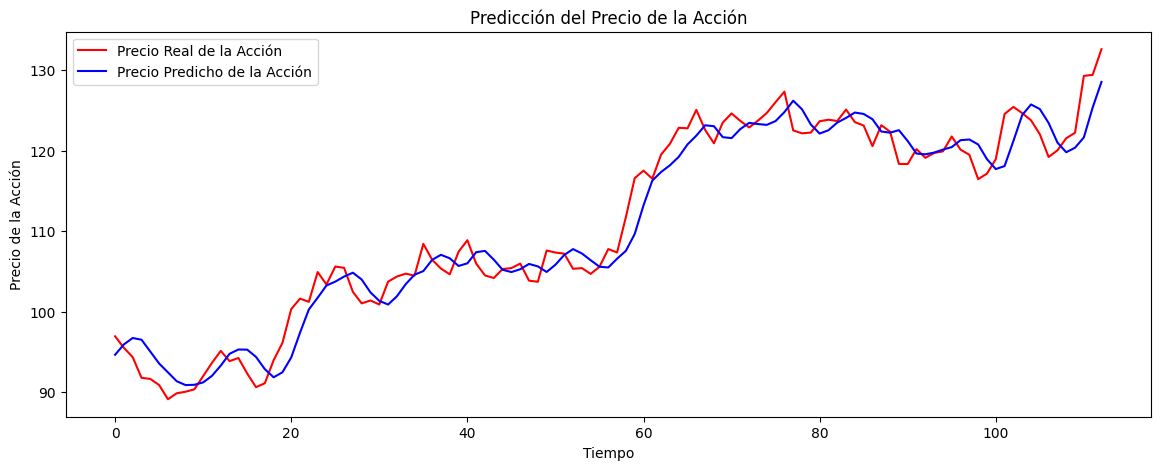

In [ ]:
# Visualización
plt.figure(figsize=(14, 5))
plt.plot(actual_stock_price, color='red', label='Precio Real de la Acción')
plt.plot(predicted_stock_price, color='blue', label='Precio Predicho de la Acción')
plt.title('Predicción del Precio de la Acción')
plt.xlabel('Tiempo')
plt.ylabel('Precio de la Acción')
plt.legend()
plt.show()